In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import scipy.stats as stats
import plot_series
import pylab

In [5]:
import os

# Get the current working directory
current_dir = os.getcwd()

# You can define a folder name like 'output'
output_folder = "results/"

# This creates the full path to the output directory
output_dir = os.path.join(current_dir, output_folder)

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [8]:
data = pd.read_csv(current_dir + '/data/sunspot_data.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                73718 non-null  int64  
 1   Year                      73718 non-null  int64  
 2   Month                     73718 non-null  int64  
 3   Day                       73718 non-null  int64  
 4   Date In Fraction Of Year  73718 non-null  float64
 5   Number of Sunspots        73718 non-null  int64  
 6   Standard Deviation        73718 non-null  float64
 7   Observations              73718 non-null  int64  
 8   Indicator                 73718 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 5.1 MB


# Initial Analysis

In [12]:
# length of the time period
data.describe()

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
count,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000
mean,36858.500000,1918.416750,6.518896,15.729347,1918.916406,79.248732,6.924587,4.429678,0.998331
std,21280.697909,58.264401,3.447114,8.800032,58.264520,77.470942,4.778793,7.884112,0.040814
min,0.000000,1818.000000,1.000000,1.000000,1818.001000,-1.000000,-1.000000,0.000000,0.000000
25%,18429.250000,1868.000000,4.000000,8.000000,1868.458500,15.000000,3.000000,1.000000,1.000000
50%,36858.500000,1918.000000,7.000000,16.000000,1918.917500,58.000000,6.600000,1.000000,1.000000
75%,55287.750000,1969.000000,10.000000,23.000000,1969.373250,125.000000,10.000000,1.000000,1.000000
max,73717.000000,2019.000000,12.000000,31.000000,2019.832000,528.000000,77.700000,60.000000,1.000000


In [21]:
group2 = data.groupby([data['Year'].astype(int),data['Month'].astype(int)]).mean()

sunspots = np.array(group2['Number of Sunspots'].astype(int))
time_step = np.array(group2['Date In Fraction Of Year'])

time = np.arange(sunspots.size)
series = np.array(sunspots)

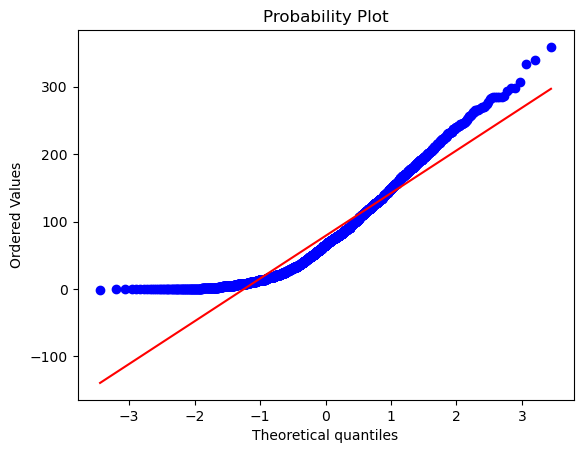

In [22]:
stats.probplot(series, plot=pylab)
pylab.show()